# Bank Customer Churn  Modeling

In [22]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

# Exploratory Data Analysis

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [25]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

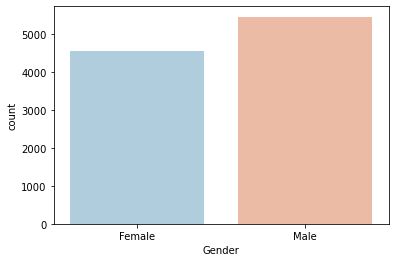

In [44]:
sns.countplot(x='Gender',data=df,palette='RdBu_r')

In [26]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [29]:
print(df['Gender'].unique())
print(df['Geography'].unique())

['Female' 'Male']
['France' 'Spain' 'Germany']


<AxesSubplot:xlabel='Geography', ylabel='count'>

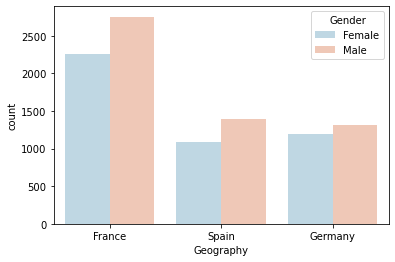

In [30]:
sns.countplot(x='Geography',hue= 'Gender', data=df,palette='RdBu_r', alpha=0.8)

<AxesSubplot:xlabel='Gender', ylabel='count'>

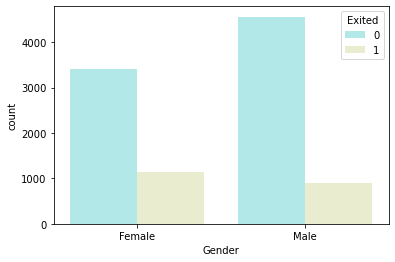

In [32]:
sns.countplot(x='Gender', hue = 'Exited',data = df,palette='rainbow', alpha=0.4)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

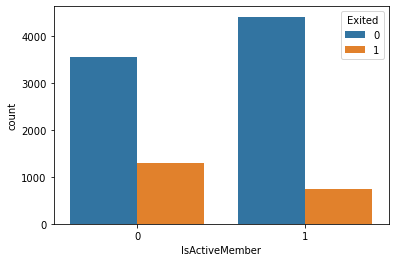

In [33]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

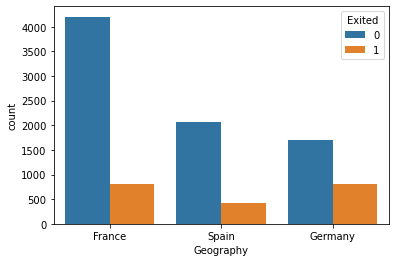

In [37]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

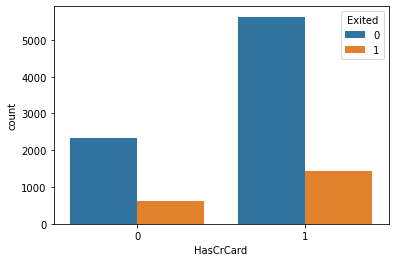

In [38]:

sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

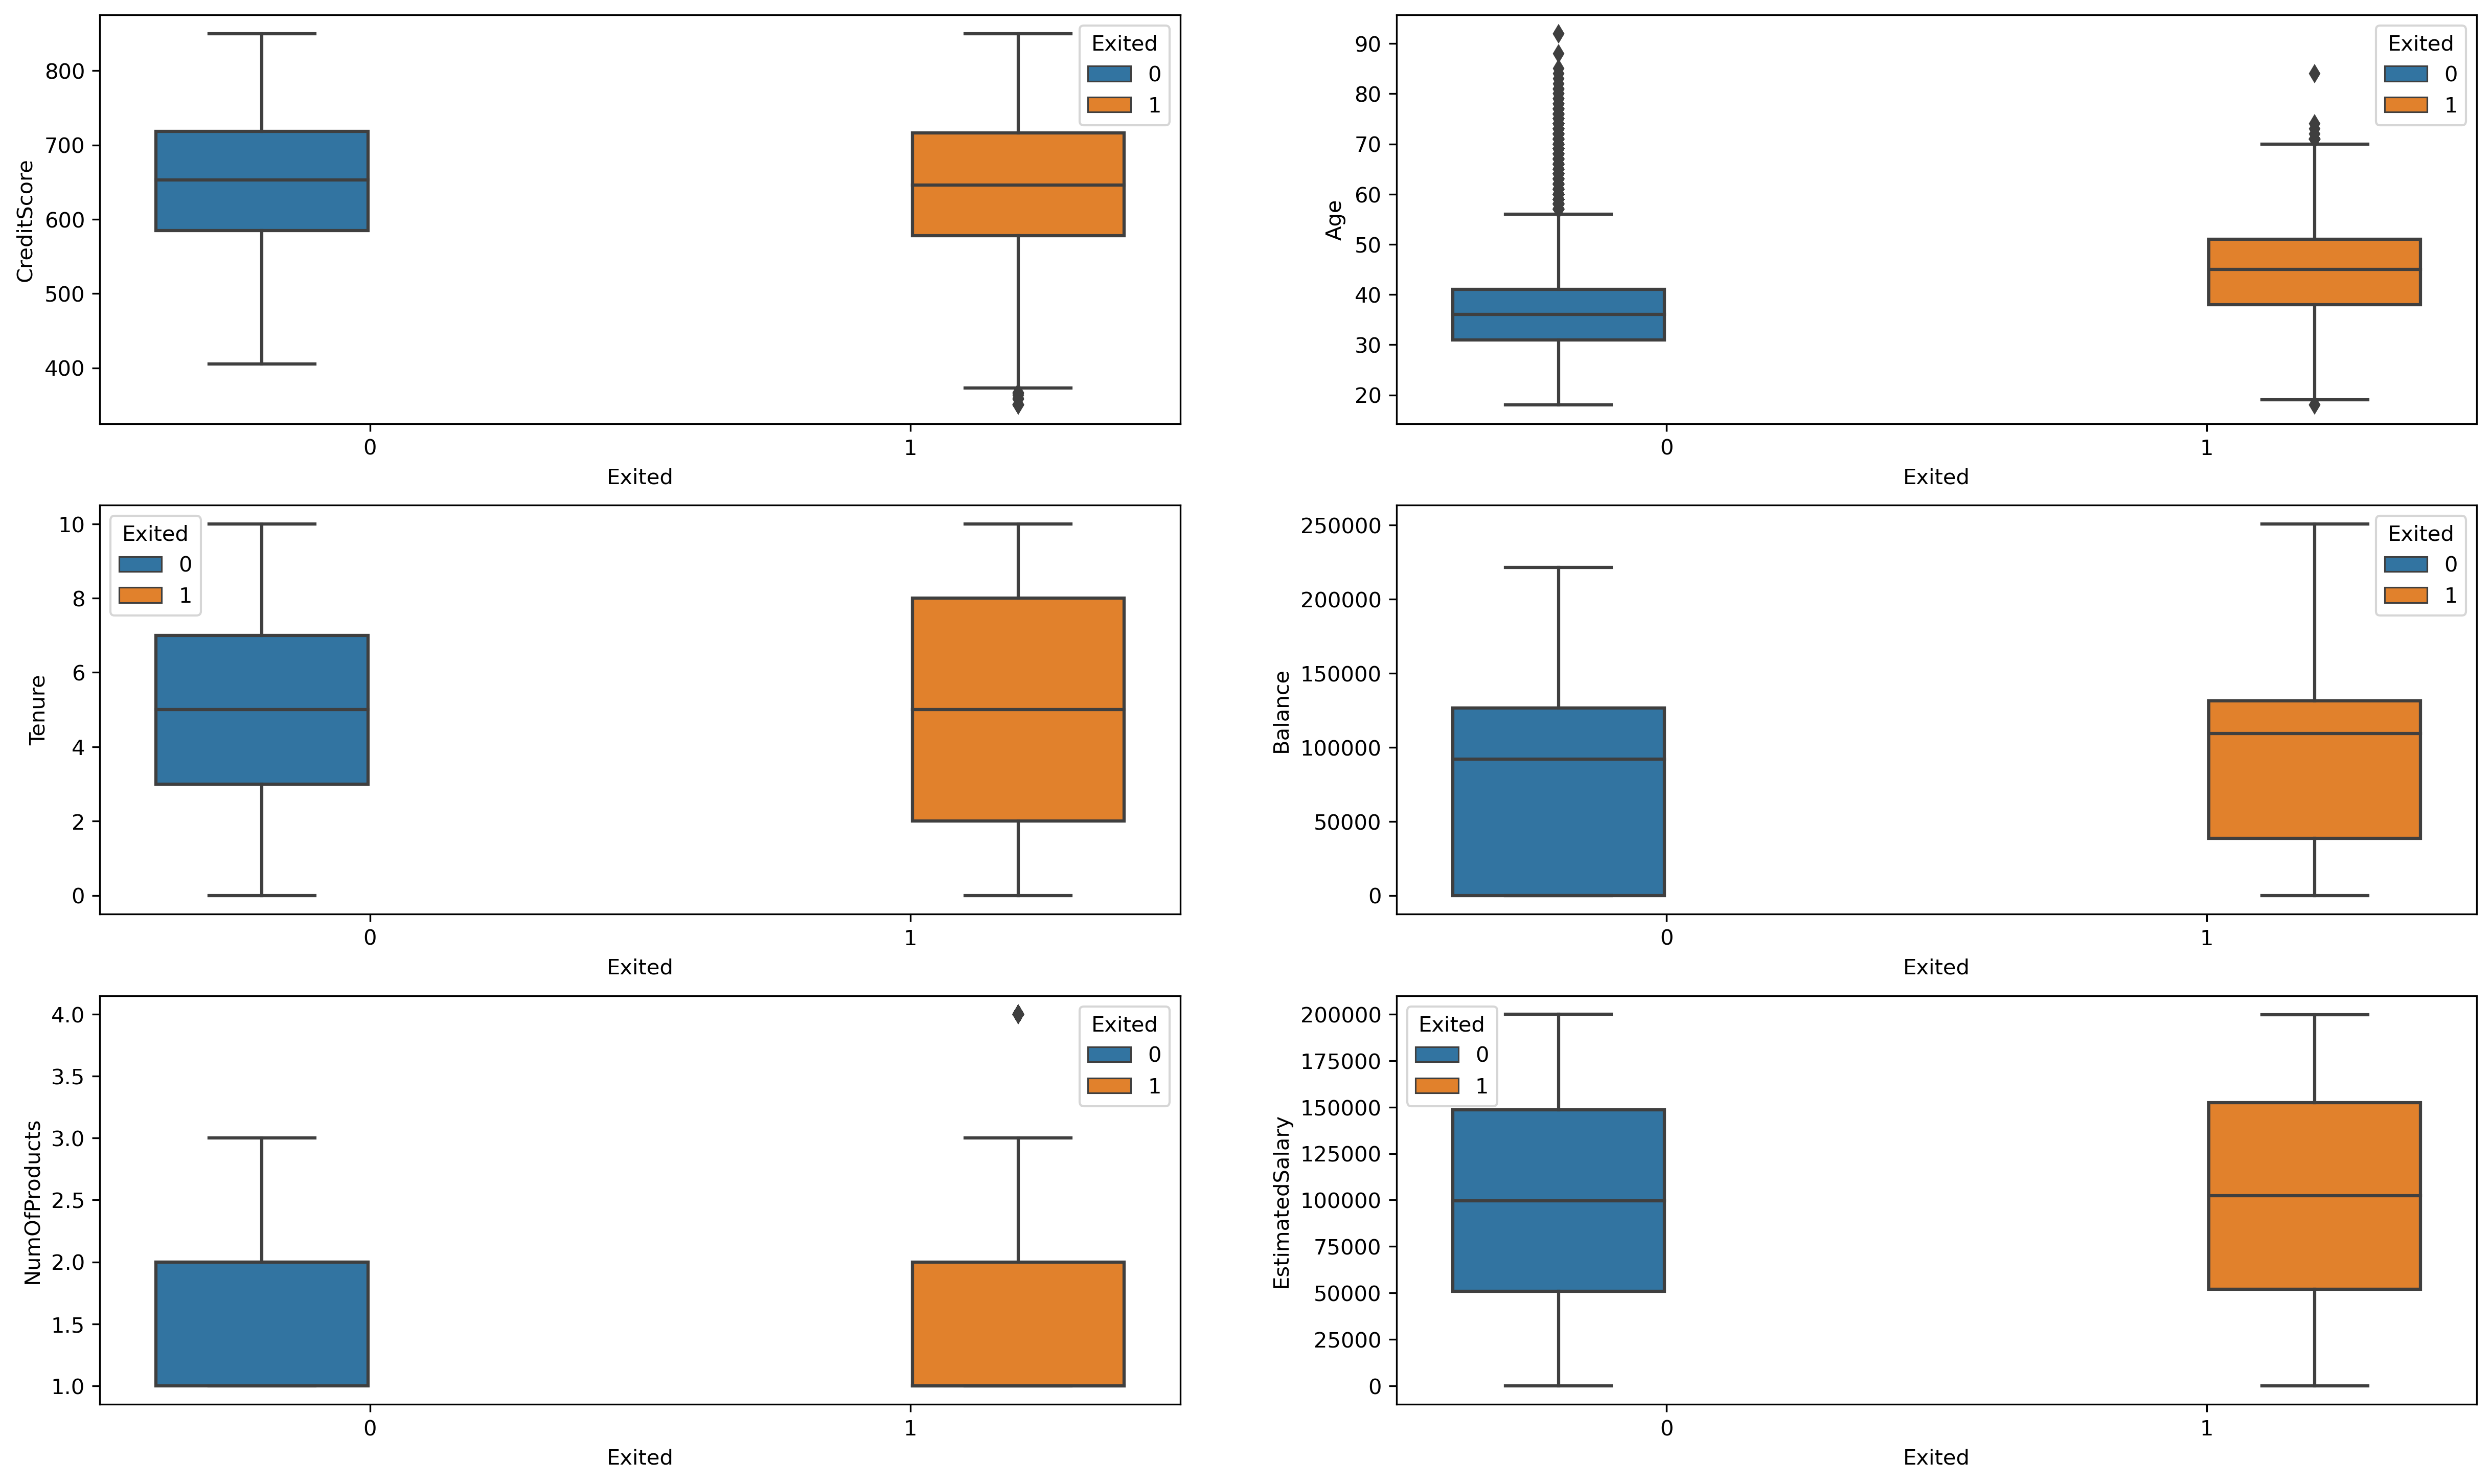

In [10]:
fig, arr = plt.subplots(3, 2, figsize=(20, 12), dpi = 300)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=arr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=arr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=arr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=arr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=arr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=arr[2][1])

# Feature engineering

In [11]:
#Create dummy variables One Hot Encoding
geography=pd.get_dummies(df["Geography"],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [12]:
## Drop Unnecessary columns
df.drop(['Geography','Gender'],axis=1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 937.6+ KB


In [14]:
## Concatenate the Data Frames

df=pd.concat([df,geography,gender],axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
 12  Germany          10000 non-null  uint8  
 13  Spain            10000 non-null  uint8  
 14  Male             10000 non-null  uint8  
dtypes: float64(2), int64(9), object(1), uint8(3)
memory usage: 966.9+ KB


In [16]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace = True)

In [17]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Germany              uint8
Spain                uint8
Male                 uint8
dtype: object

In [18]:
df.shape

(10000, 12)